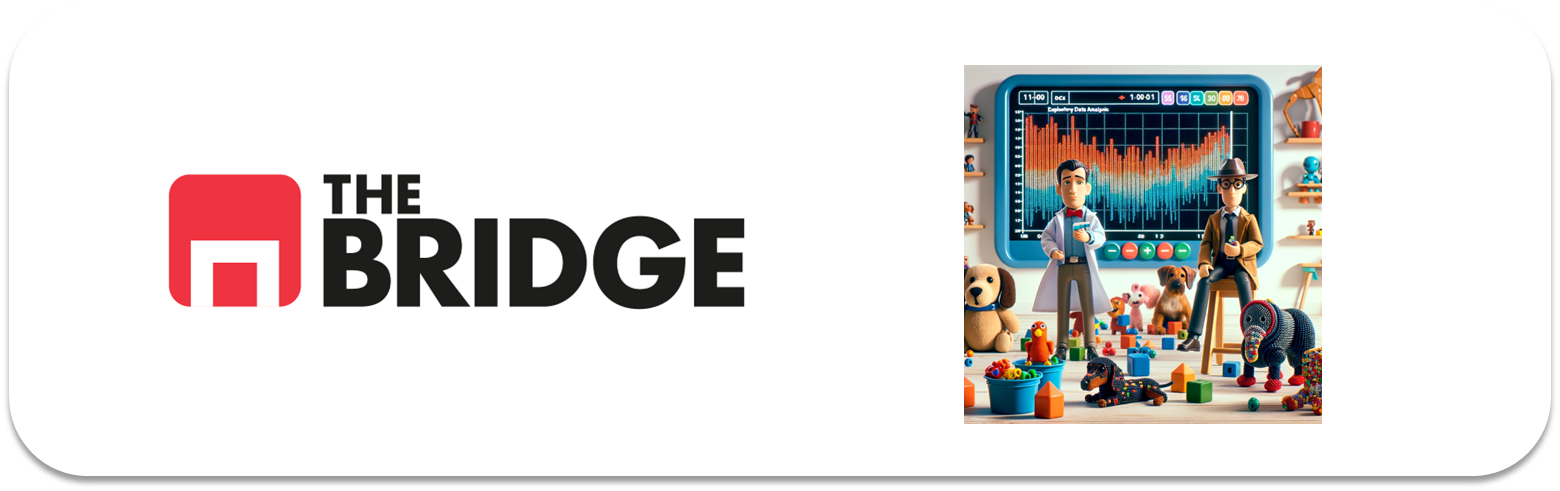

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(["deck", "survived", "pclass", "embarked"], axis = 1, inplace=True) 

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"]= df_titanic["parch"]+df_titanic["sibsp"]
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


In [5]:
df_titanic.drop(["parch", "sibsp"], axis = 1, inplace=True) 

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
moda_embarked = df_titanic["embark_town"].mode()[0]
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = moda_embarked

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
df_titanic["age"] = df_titanic.groupby("who")["age"].transform("mean").fillna(df_titanic["age"]).round(2)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,33.17,7.2500,Third,man,True,Southampton,no,False,1
1,female,32.00,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,32.00,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,32.00,53.1000,First,woman,False,Southampton,yes,False,1
4,male,33.17,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,33.17,13.0000,Second,man,True,Southampton,no,True,0
887,female,32.00,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.00,23.4500,Third,woman,False,Southampton,no,False,3
889,male,33.17,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [8]:
#1
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic) * 100, df_titanic.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
sex,2,0.224467,object
age,3,0.3367,float64
fare,248,27.833895,float64
class,3,0.3367,object
who,3,0.3367,object
adult_male,2,0.224467,bool
embark_town,3,0.3367,object
alive,2,0.224467,object
alone,2,0.224467,bool
family_members,9,1.010101,int64


In [9]:
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
sex,2,0.224467,object,Binaria
age,3,0.3367,float64,Categorica
fare,248,27.833895,float64,Numerica Discreta
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria
embark_town,3,0.3367,object,Categorica
alive,2,0.224467,object,Binaria
alone,2,0.224467,bool,Binaria
family_members,9,1.010101,int64,Categorica


In [10]:
df_tipificacion.loc["fare", "clasificada_como"] = "Numerica Continua"


In [11]:
categoricas_titanic = [
    "sex",
    "age",
    "class",
    "who",
    "adult_male",
    "embark_town",
    "alive",
    "alone",
    "family_members",
]

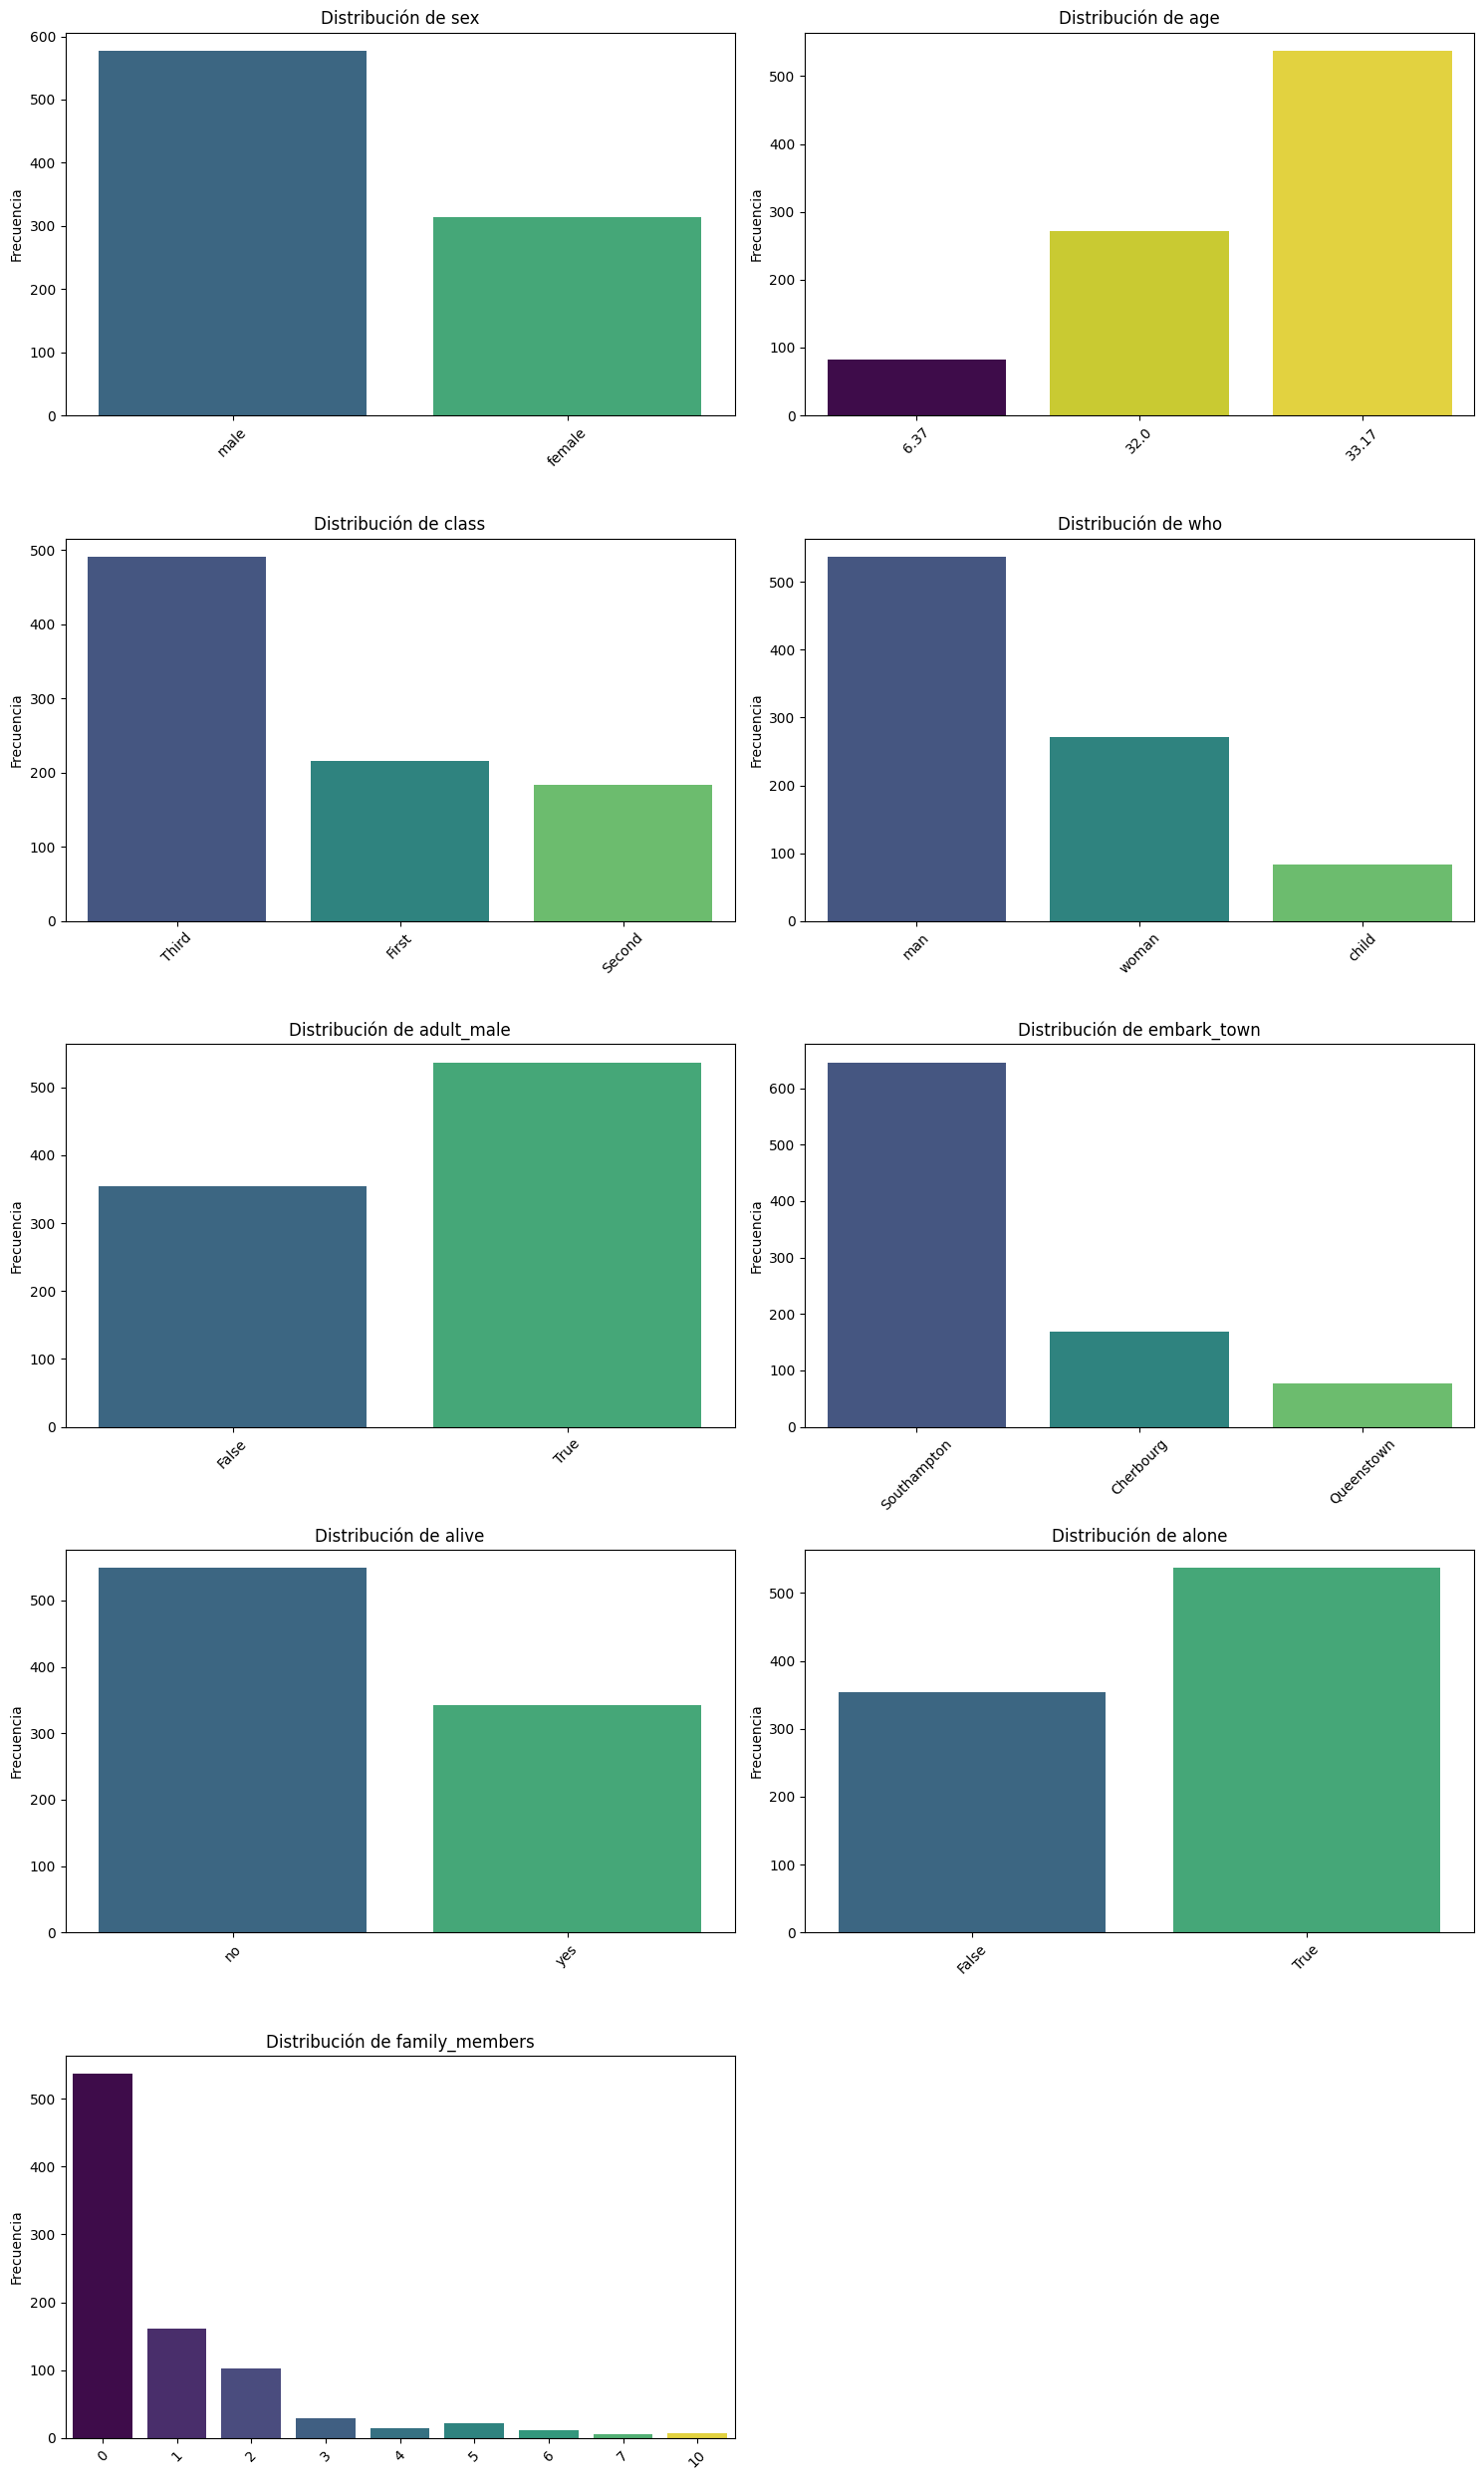

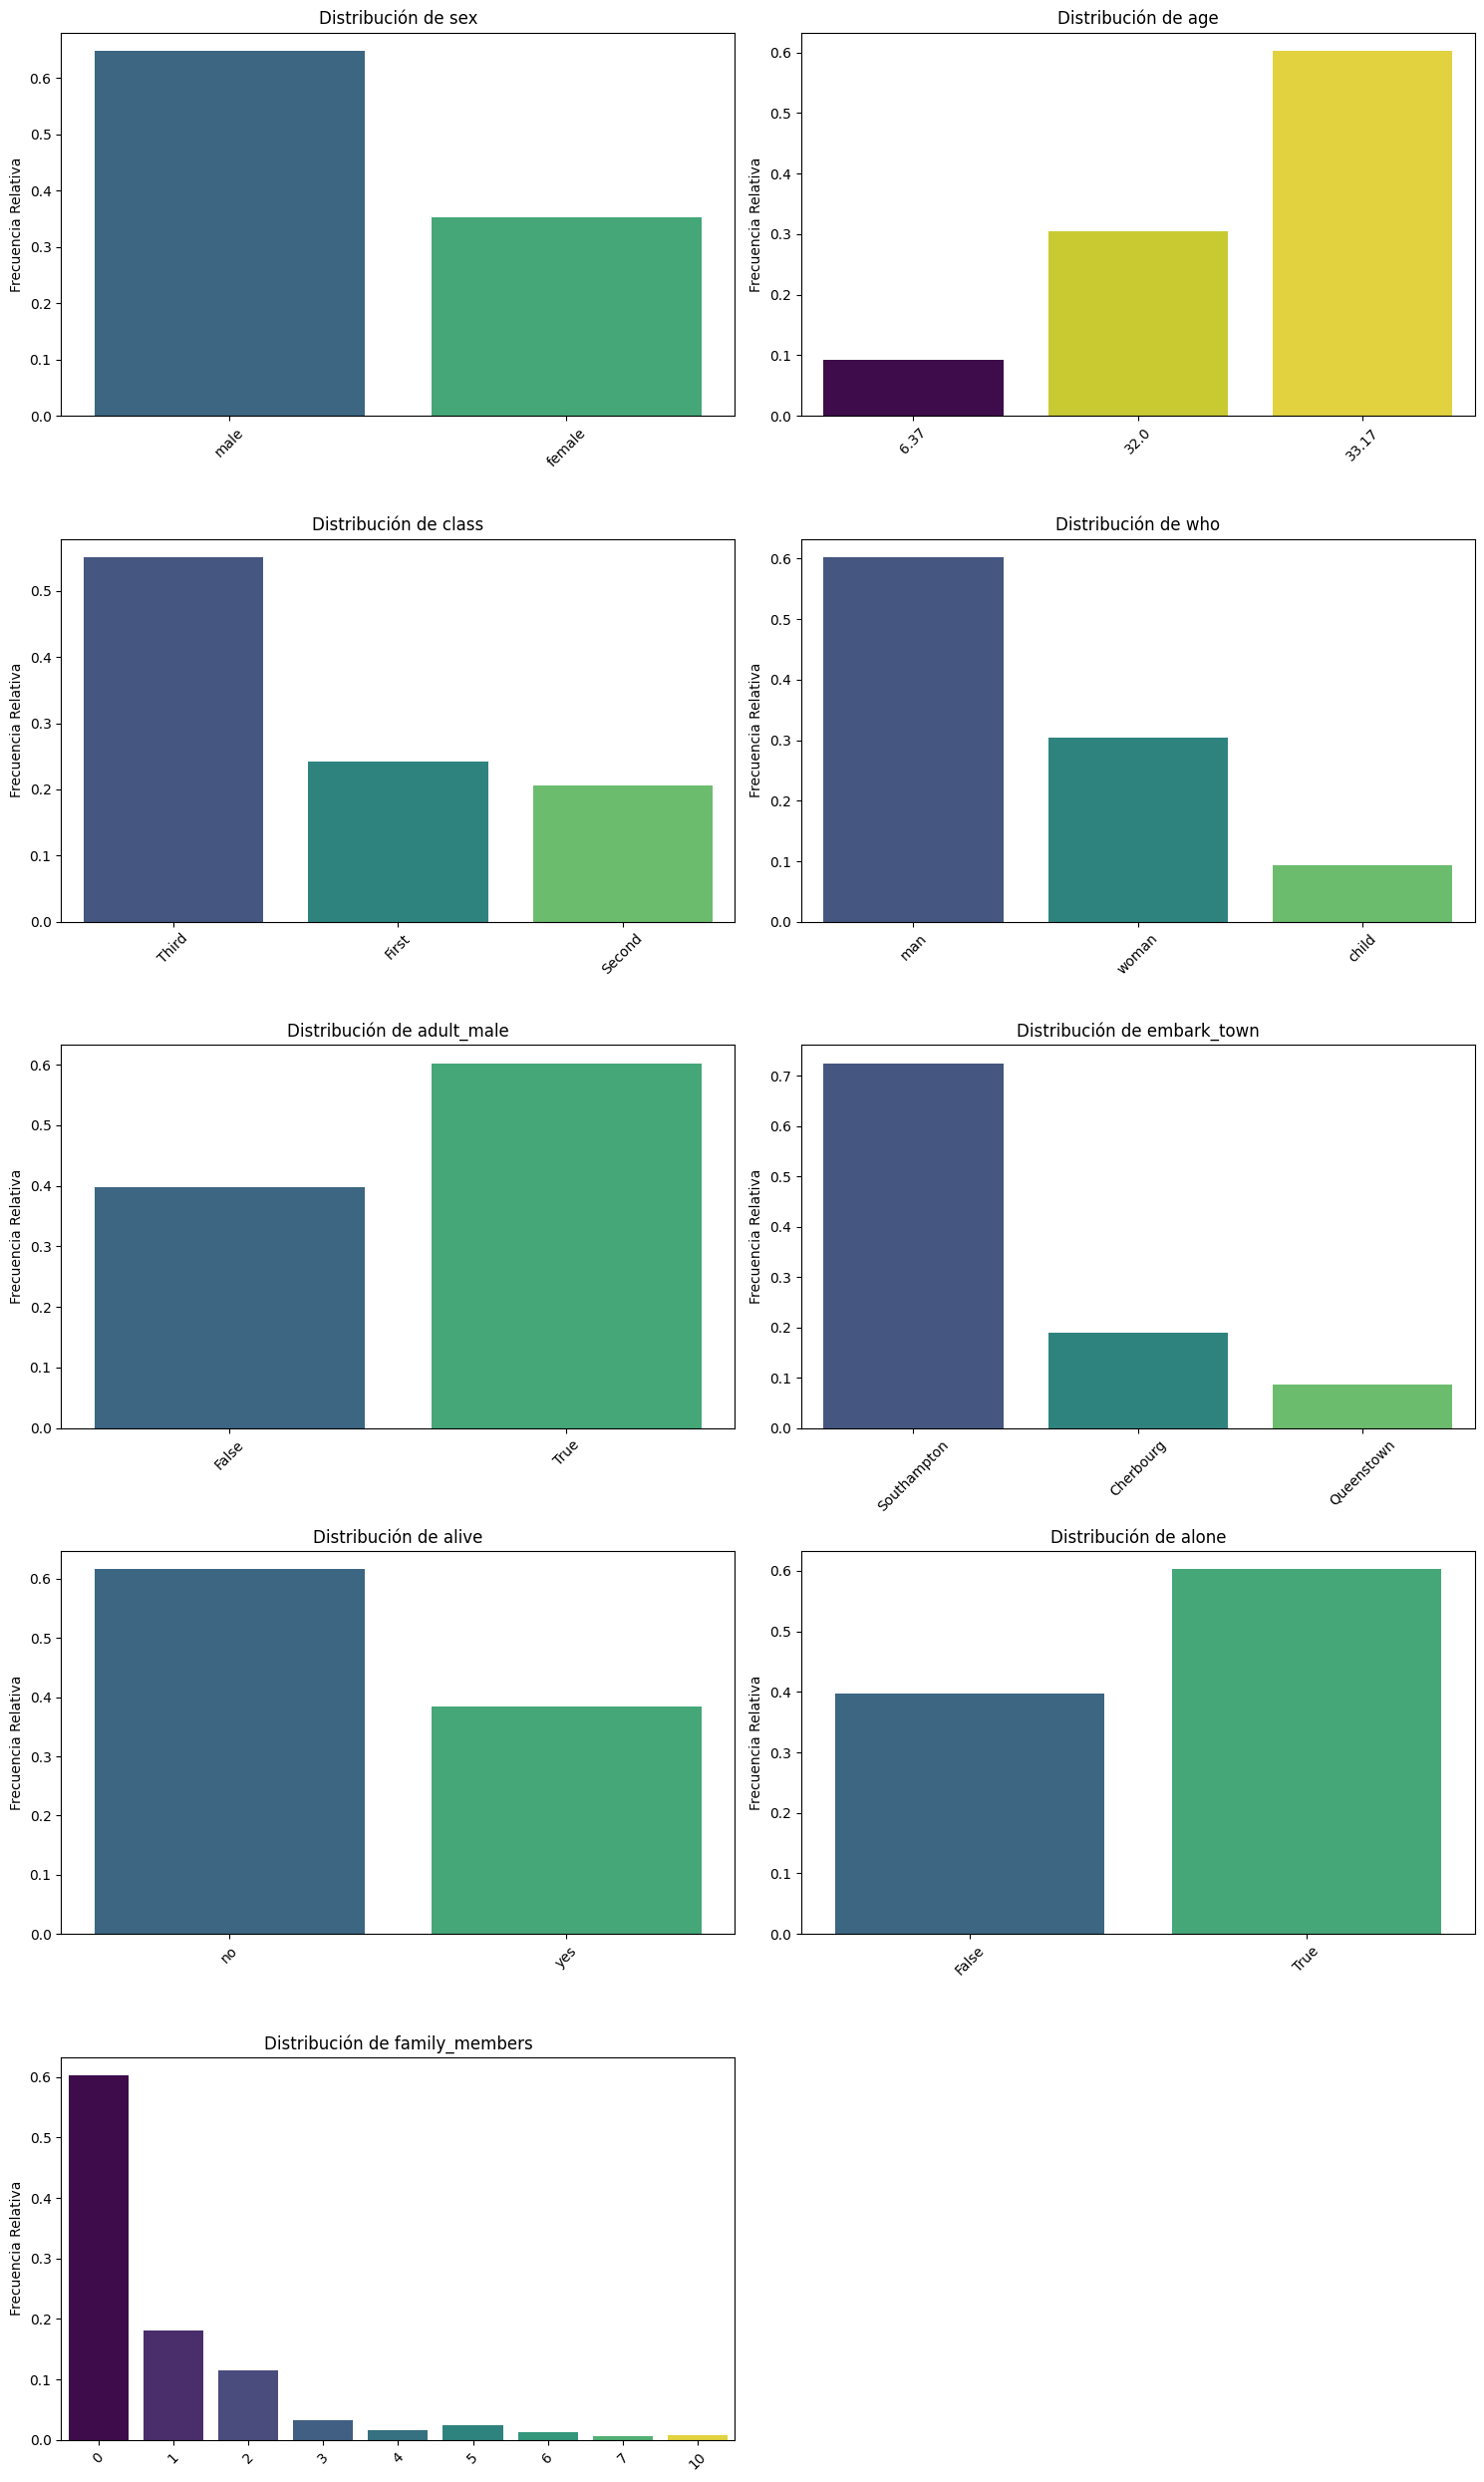

In [12]:
#Frecuencia absoluta
pinta_distribucion_categoricas(df_titanic, categoricas_titanic)
#En términos absolutos sobrevivieron más hombres
#Frecuencia relativa
pinta_distribucion_categoricas(df_titanic, categoricas_titanic, relativa = True)
# Sobrevivieron el 60% de los hombres

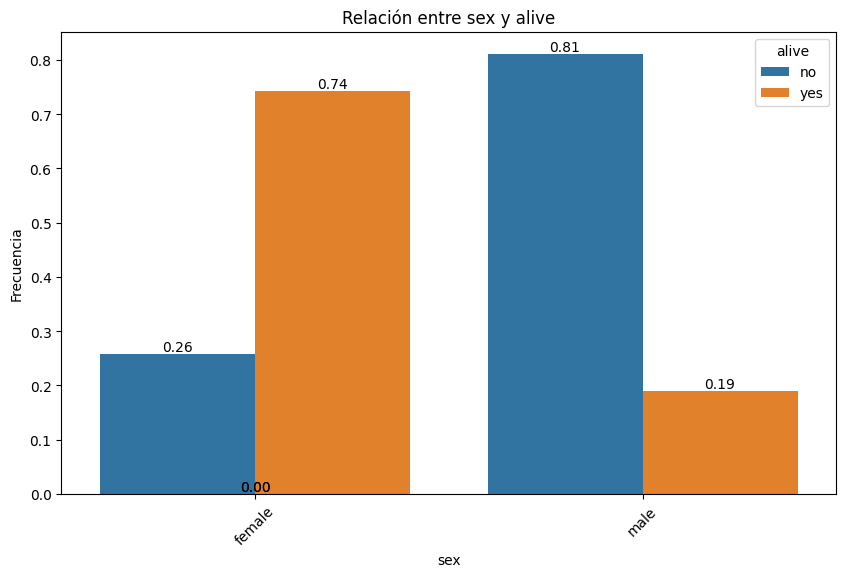

In [13]:
plot_categorical_relationship_fin(df_titanic, "sex","alive", relative_freq = True, show_values = True)

In [14]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["sex"])

tabla_contingencia


sex,female,male
alive,,
no,81,468
yes,233,109


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
'''
Sí hay una relación significativa entre el sexo y la supervivencia en el Titanic.
Los resultados muestran que las mujeres tenían una probabilidad de sobrevivir mucho mayor que los hombres
'''

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


'\nSí existe una relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic.\nLos resultados muestran que las mujeres tenían una probabilidad de sobrevivir mucho mayor que los hombres, \ny esta diferencia no se debe al azar, sino a una relación real y fuerte entre ambas variables.\n'

In [16]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["adult_male"])

tabla_contingencia


adult_male,False,True
alive,,
no,100,449
yes,254,88


In [17]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
'''
Sí hay una relación muy fuerte entre ser hombre adulto y no sobrevivir en el Titanic
Los datos muestran que la mayoría de los hombres adultos murieron, mientras que mujeres y niños tuvieron muchas más probabilidades de sobrevivir.
'''

Valor Chi-Cuadrado: 274.17535541599455
P-Value: 1.3961564139018175e-61
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[218.12121212 330.87878788]
 [135.87878788 206.12121212]]


'\nSí hay una relación muy fuerte entre ser hombre adulto y no sobrevivir en el Titanic\nLos datos muestran que la mayoría de los hombres adultos murieron, mientras que mujeres y niños tuvieron muchas más probabilidades de sobrevivir.\n'

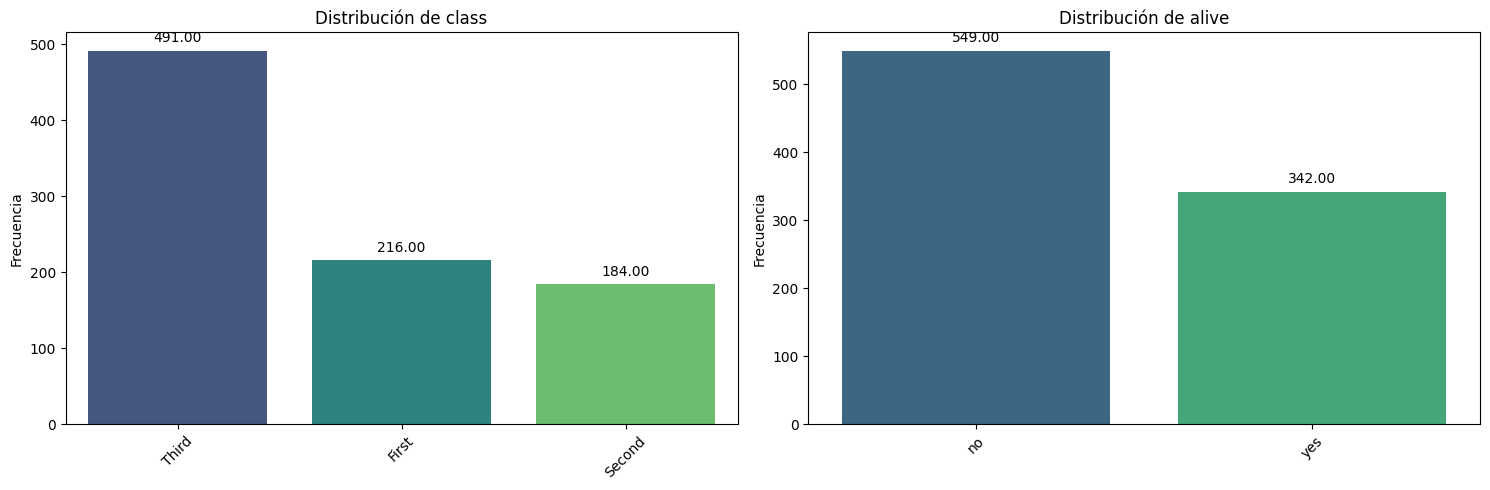

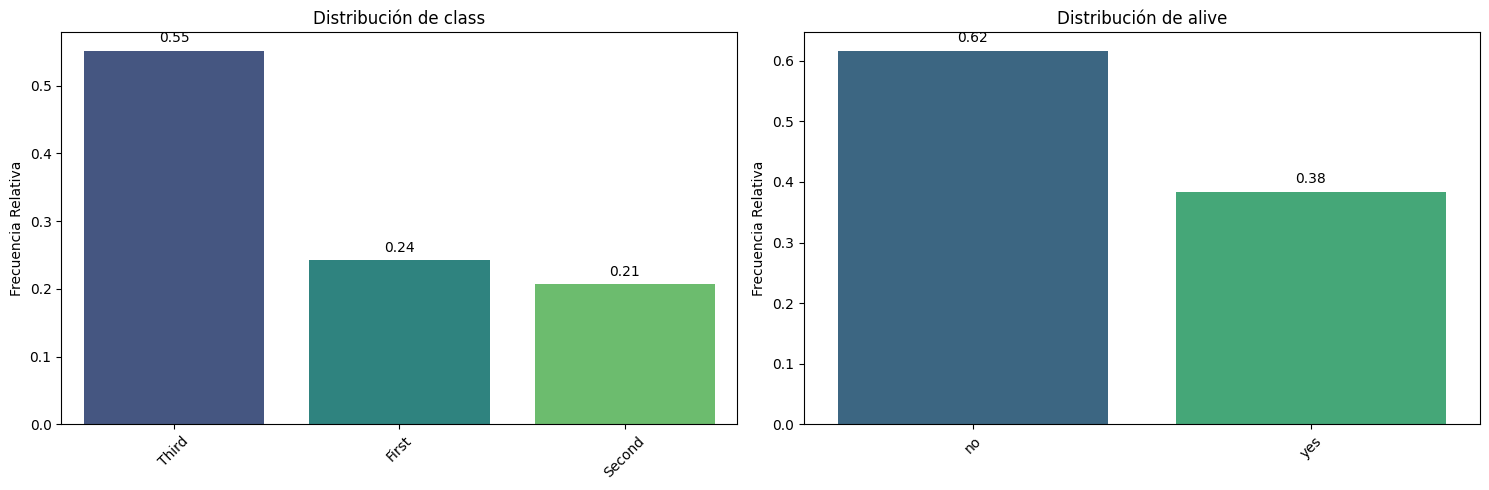

In [18]:
#2
#Frecuencia absoluta
pinta_distribucion_categoricas(df_titanic,["class","alive"], relativa= False, mostrar_valores= True)

#Frecuencia relativa
pinta_distribucion_categoricas(df_titanic,["class","alive"], relativa= True, mostrar_valores= True)

In [19]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["class"])

tabla_contingencia

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
'''
Sí hay una relación significativa entre la clase en la que viajaba un pasajero y su probabilidad de sobrevivir
Los pasajeros de primera clase sobrevivieron mucho más que los de segunda y tercera
En cambio los de tercera clase fueron los que más muertos tuvieron
'''

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


'\nSí hay una relación estadísticamente significativa entre la clase en la que viajaba un pasajero y su probabilidad de sobrevivir\nLos pasajeros de primera clase sobrevivieron mucho más que los de segunda y tercera\nEn cambio, los de tercera clase fueron los que más murieron\n'

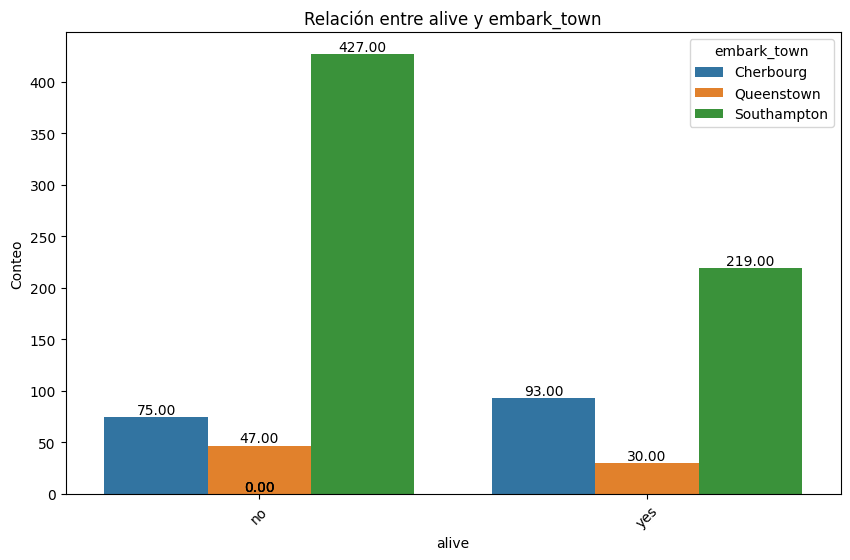

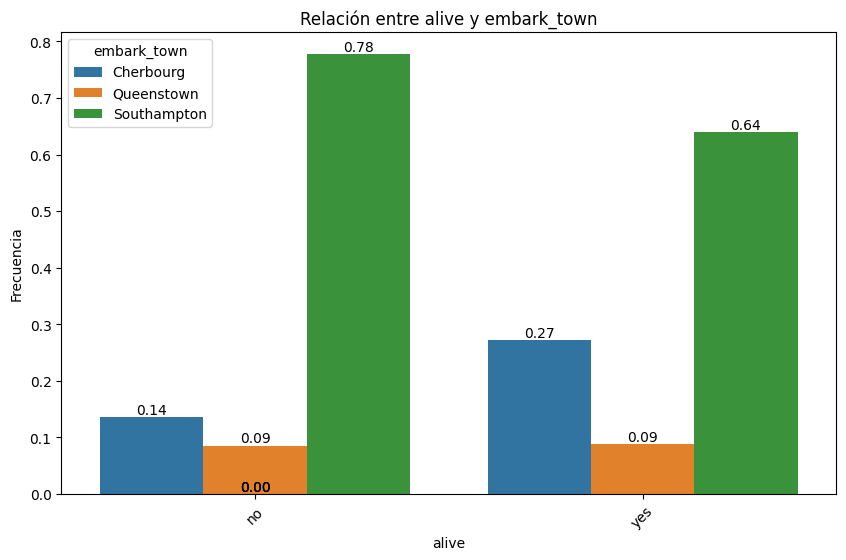

In [21]:
#3
plot_categorical_relationship_fin(df_titanic, "alive","embark_town", show_values= True)
#Sobrevivieron más personas de la ciudad de Southampton
plot_categorical_relationship_fin(df_titanic, "alive","embark_town", relative_freq = True, show_values = True)
#Sobrevivió el 64% de personas embarcadas en Southampton

In [22]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["embark_town"])

tabla_contingencia

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
'''
Sí hay una relación significativa entre la ciudad desde la que embarcaron los pasajeros y su probabilidad de sobrevivir
Los que embarcaron en Cherbourg tuvieron más probabilidades de sobrevivir, mientras que los de Southampton fueron los que más fallecieron
'''

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


'\nSí hay una relación estadísticamente significativa entre la ciudad desde la que embarcaron los pasajeros y su probabilidad de sobrevivir\nLos que embarcaron en Cherbourg tuvieron más probabilidades de sobrevivir, mientras que los de Southampton fueron los que más murieron\n'

In [24]:
#4
from scipy.stats import mannwhitneyu

grupo_a = df_titanic.loc[df_titanic.alive == "Yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "No"]["fare"]

print("Grupo A:", grupo_a.shape[0])
print("Grupo B:", grupo_b.shape[0])

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)



Grupo A: 0
Grupo B: 0
Estadístico U: nan
Valor p: nan


C:\Users\asgr2\AppData\Local\Temp\ipykernel_25548\2297750205.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)


In [ ]:
#5
sin_pago = df_titanic[df_titanic["fare"] == 0]
print("Pasajeros que no pagaron billete:", sin_pago.shape[0])
print(sin_pago[["class", "sex", "age", "embark_town", "alive"]])
'''
Las personas que no pagaron billete probablemente eran miembros de la tripulación
'''


Pasajeros que no pagaron billete: 15
      class   sex    age  embark_town alive
179   Third  male  33.17  Southampton    no
263   First  male  33.17  Southampton    no
271   Third  male  33.17  Southampton   yes
277  Second  male  33.17  Southampton    no
302   Third  male  33.17  Southampton    no
413  Second  male  33.17  Southampton    no
466  Second  male  33.17  Southampton    no
481  Second  male  33.17  Southampton    no
597   Third  male  33.17  Southampton    no
633   First  male  33.17  Southampton    no
674  Second  male  33.17  Southampton    no
732  Second  male  33.17  Southampton    no
806   First  male  33.17  Southampton    no
815   First  male  33.17  Southampton    no
822   First  male  33.17  Southampton    no


'\nLas personas que no pagaron billete probablemente eran acompañantes o eran miembros de la tripulación\n'

In [26]:
max_fare = df_titanic["fare"].max()
persona_max_fare = df_titanic[df_titanic["fare"] == max_fare]
print("\nBillete más caro pagado:", max_fare)
print(persona_max_fare[["class", "sex", "age", "embark_town", "alive"]])
# Las personas que más dinero se dejaron sobrevivieron



Billete más caro pagado: 512.3292
     class     sex    age embark_town alive
258  First  female  32.00   Cherbourg   yes
679  First    male  33.17   Cherbourg   yes
737  First    male  33.17   Cherbourg   yes


'\nLos pasajeros con billetes más caros tenían más probabilidad de sobrevivir\nCherbourg al tener más pasajeros de primera clase, está asociado con mayor supervivencia\nSouthampton y Queenstown con más pasajeros de tercera clase, están asociados con menor supervivencia\n'

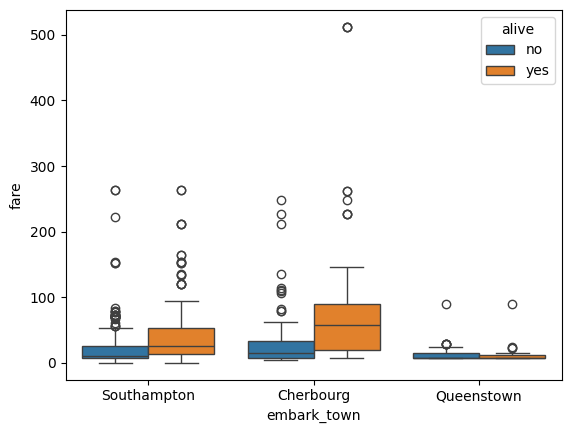

In [ ]:
#6
sns.boxplot(data=df_titanic, x="embark_town", y='fare', hue="alive")
'''
Los pasajeros con billetes más caros tenían más probabilidad de sobrevivir
Cherbourg al tener más pasajeros de primera clase está asociado con mayor supervivencia
Southampton y Queenstown con más pasajeros de tercera clase están asociados con menor supervivencia
'''

In [40]:
#7
columnas = ["alive","class","age"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


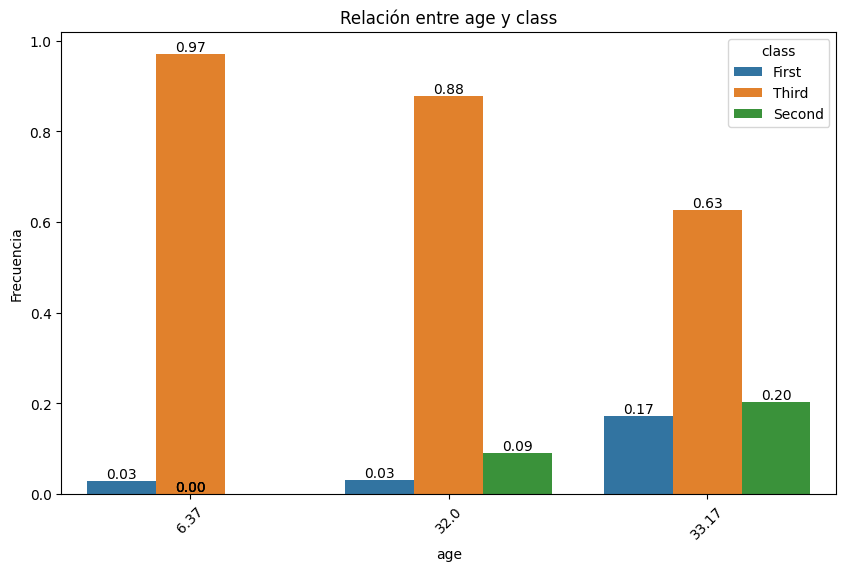

Respuesta yes:


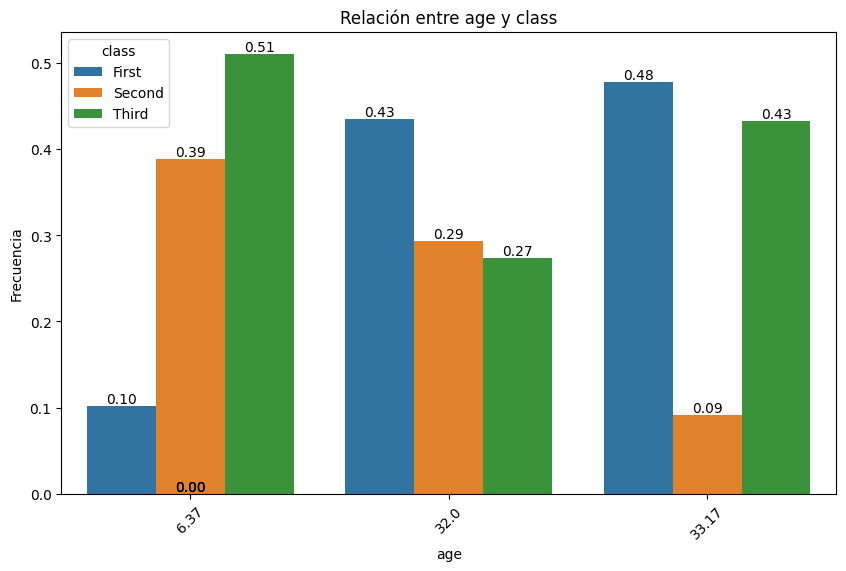

In [41]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

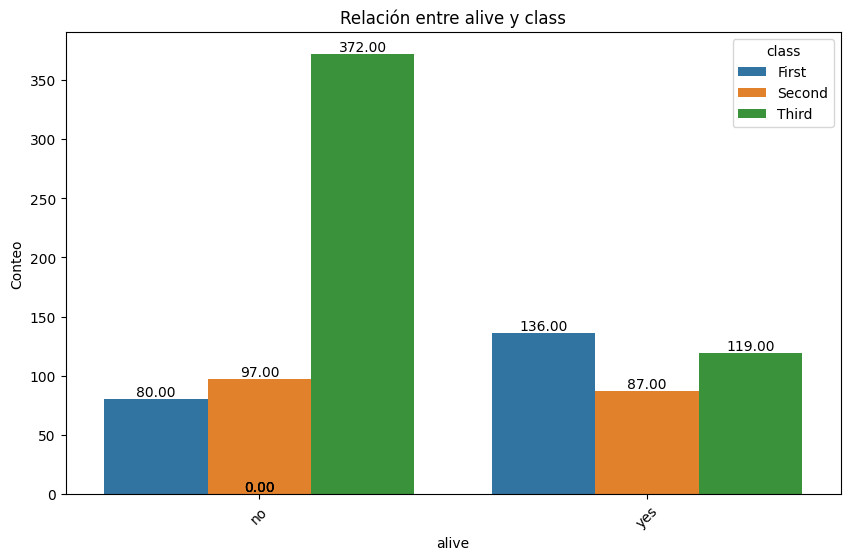

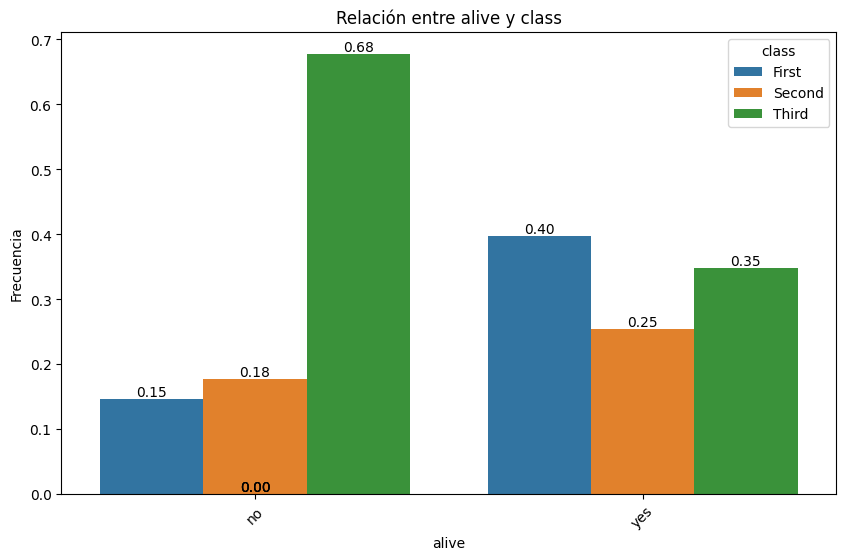

In [ ]:
plot_categorical_relationship_fin(df_titanic, "alive","class", show_values= True)
#Sobrevivieron más personas de 1ª clase y murieron muchas de 3ª
plot_categorical_relationship_fin(df_titanic, "alive","class", relative_freq = True, show_values = True)
#Sobrevivió el 40% de personas dde 1ª clase y el 35% de 3ª clase pero murieron muchas más personas de 3ª clase 68% respecto al total. 

In [ ]:
#8
columnas = ["alive","fare","age"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]
    #IMP ver por qué la gráfica no se ve bien

Respuesta no:


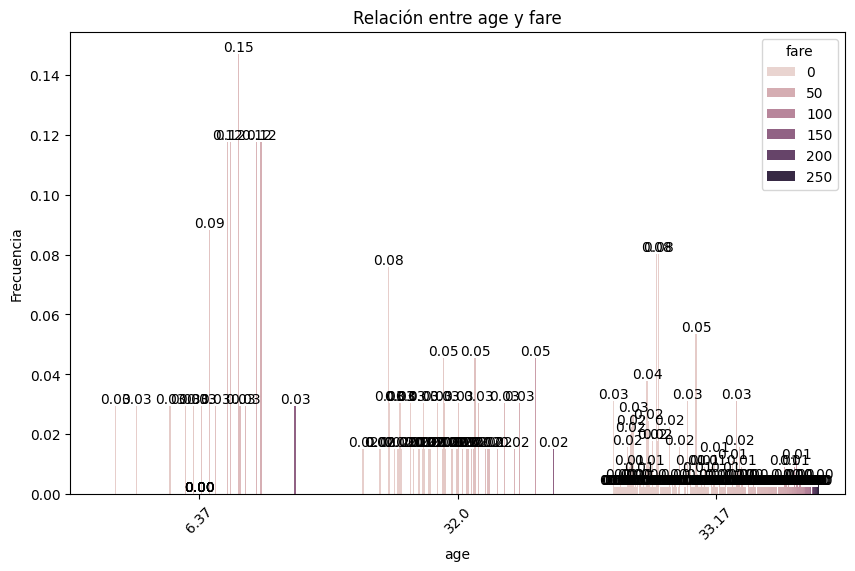

Respuesta yes:


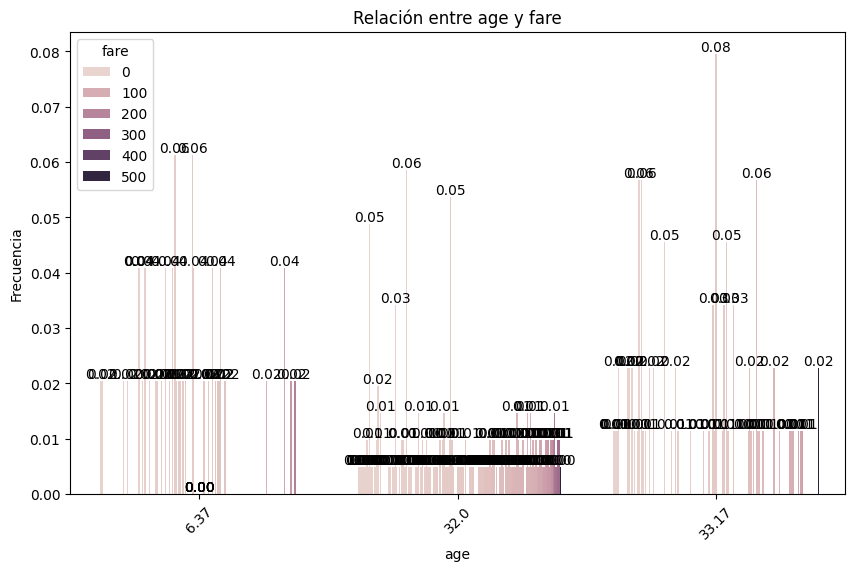

In [47]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

<Axes: xlabel='age', ylabel='fare'>

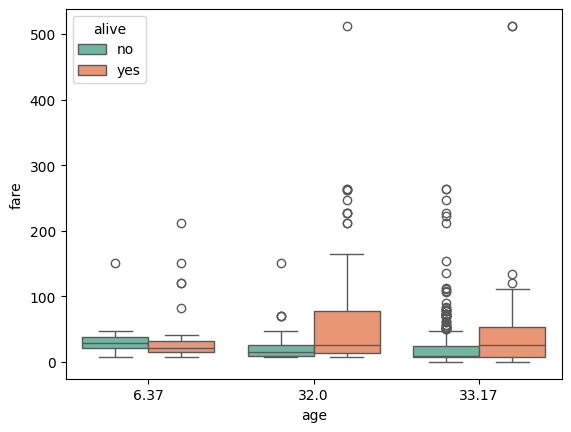

In [ ]:
sns.boxplot(data=df_titanic, x="age", y="fare", hue="alive", palette="Set2")
'''
Sí hay una relación clara entre edad, coste de billete y supervivencia
Los pasajeros adultos que pagaron más tuvieron más probabilidad de sobrevivir
Los pasajeros de todas las edades que pagaron menos tuvieron menos probabilidad de sobrevivir
Podemos decir que la clase social vista anteriorme influyo mucho en las probabilidad de supervivencia 
Ya que los que pertenecian a primera clase podían comprar billetes más caros y en su mayoría eran personas adultas 
Por eso pocos niños pudieron sobrevivir
'''

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?